In [1]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score 
from sklearn.preprocessing import LabelEncoder

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
#Datasetinin eklenmesi
data=pd.read_csv('Heart_Disease_Prediction.csv')


In [3]:
data['Heart_Disease'].value_counts()

Absence     150
Presence    120
Name: Heart_Disease, dtype: int64

In [4]:
#Data için istatiksel özet bilgileri hesapladık.
#Ortalama,standart sapma,sayıların toplamı...
round(data.describe(),2)

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.00,270.00,270.00,270.00,270.00,270.00,270.00,270.00,270.00,270.00,270.00,270.00,270.00,270.00
mean,134.50,54.43,0.68,3.17,131.34,249.66,0.15,1.02,149.68,0.33,1.05,1.59,0.67,4.70
std,78.09,9.11,0.47,0.95,17.86,51.69,0.36,1.00,23.17,0.47,1.15,0.61,0.94,1.94
min,0.00,29.00,0.00,1.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00,3.00
25%,67.25,48.00,0.00,3.00,120.00,213.00,0.00,0.00,133.00,0.00,0.00,1.00,0.00,3.00
50%,134.50,55.00,1.00,3.00,130.00,245.00,0.00,2.00,153.50,0.00,0.80,2.00,0.00,3.00
75%,201.75,61.00,1.00,4.00,140.00,280.00,0.00,2.00,166.00,1.00,1.60,2.00,1.00,7.00
max,269.00,77.00,1.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,3.00,7.00


Text(0, 0.5, 'Thallium')

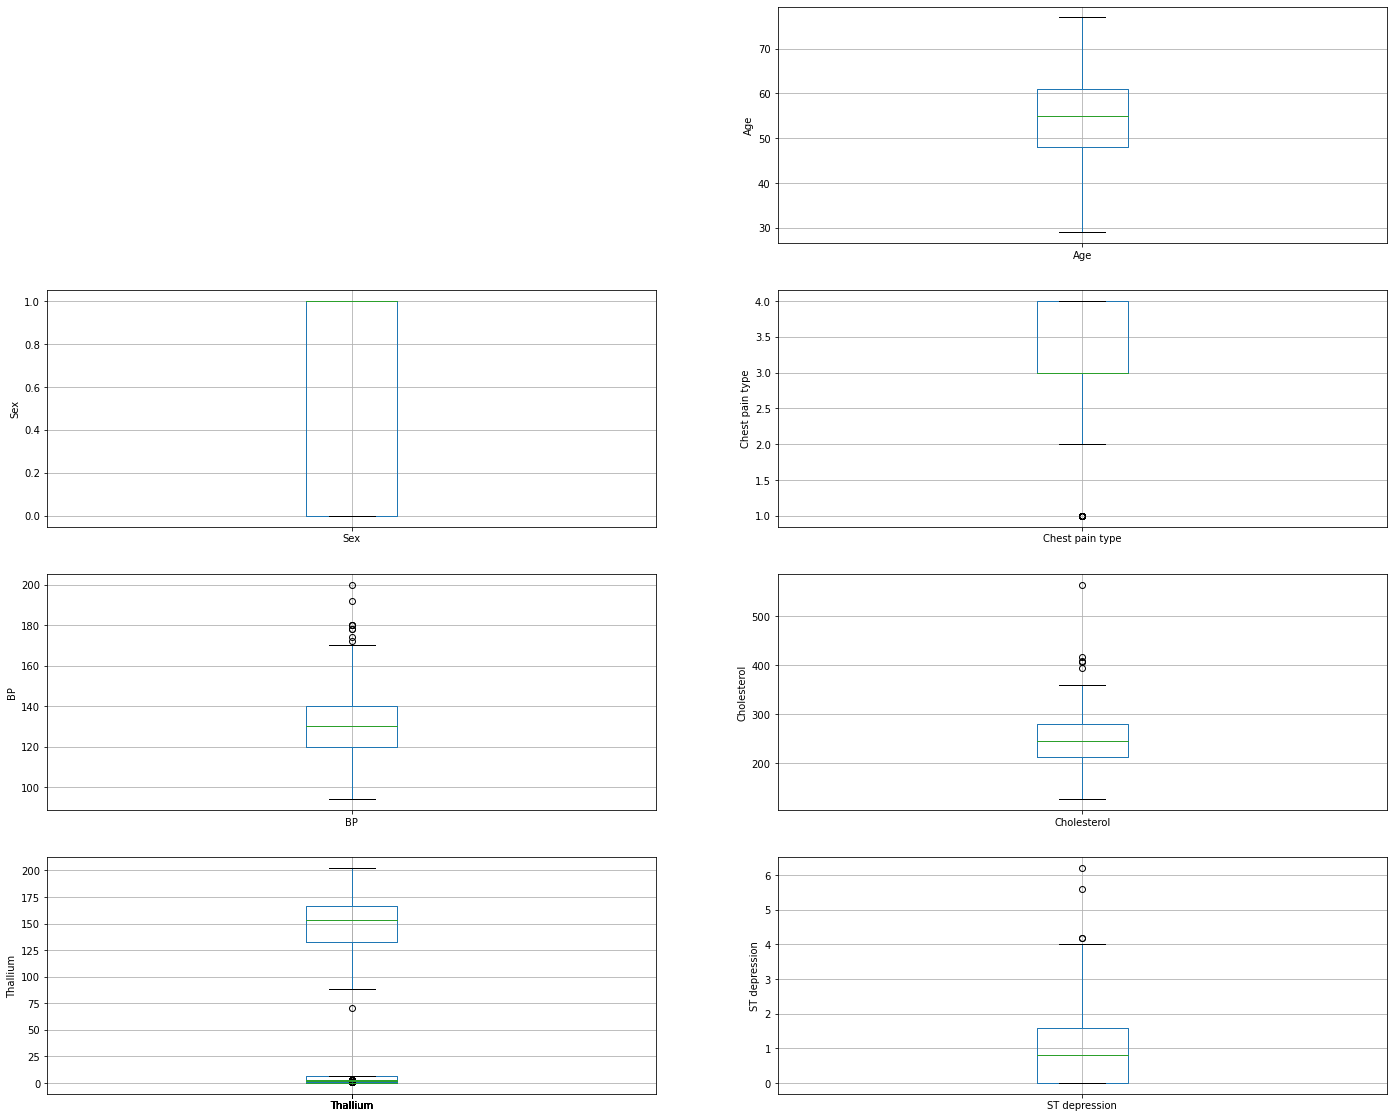

In [5]:
#Kutu grafiği (box plot) oluşturma,veri noktalarının dağılımını görmek için kullandık.
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 2)
fig = data.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')

plt.subplot(4, 2, 3)
fig = data.boxplot(column='Sex')
fig.set_title('')
fig.set_ylabel('Sex')

plt.subplot(4, 2, 4)
fig = data.boxplot(column='Chest pain type')
fig.set_title('')
fig.set_ylabel('Chest pain type')

plt.subplot(4, 2, 5)
fig = data.boxplot(column='BP')
fig.set_title('')
fig.set_ylabel('BP')

plt.subplot(4, 2, 6)
fig = data.boxplot(column='Cholesterol')
fig.set_title('')
fig.set_ylabel('Cholesterol')

plt.subplot(4, 2, 7)
fig = data.boxplot(column='FBS over 120')
fig.set_title('')
fig.set_ylabel('FBS over 120')

plt.subplot(4, 2, 7)
fig = data.boxplot(column='EKG results')
fig.set_title('')
fig.set_ylabel('EKG results')

plt.subplot(4, 2, 7)
fig = data.boxplot(column='Max HR')
fig.set_title('')
fig.set_ylabel('Max HR')

plt.subplot(4, 2, 7)
fig = data.boxplot(column='Exercise angina')
fig.set_title('')
fig.set_ylabel('Exercise angina')

plt.subplot(4, 2, 7)
fig = data.boxplot(column='Slope of ST')
fig.set_title('')
fig.set_ylabel('Slope of ST')

plt.subplot(4, 2, 7)
fig = data.boxplot(column='Number of vessels fluro')
fig.set_title('')
fig.set_ylabel('Number of vessels fluro')

plt.subplot(4, 2, 8)
fig = data.boxplot(column='ST depression')
fig.set_title('')
fig.set_ylabel('ST depression')

plt.subplot(4, 2, 7)
fig = data.boxplot(column='Thallium')
fig.set_title('')
fig.set_ylabel('Thallium')

Text(0, 0.5, 'Number of pulsar stars')

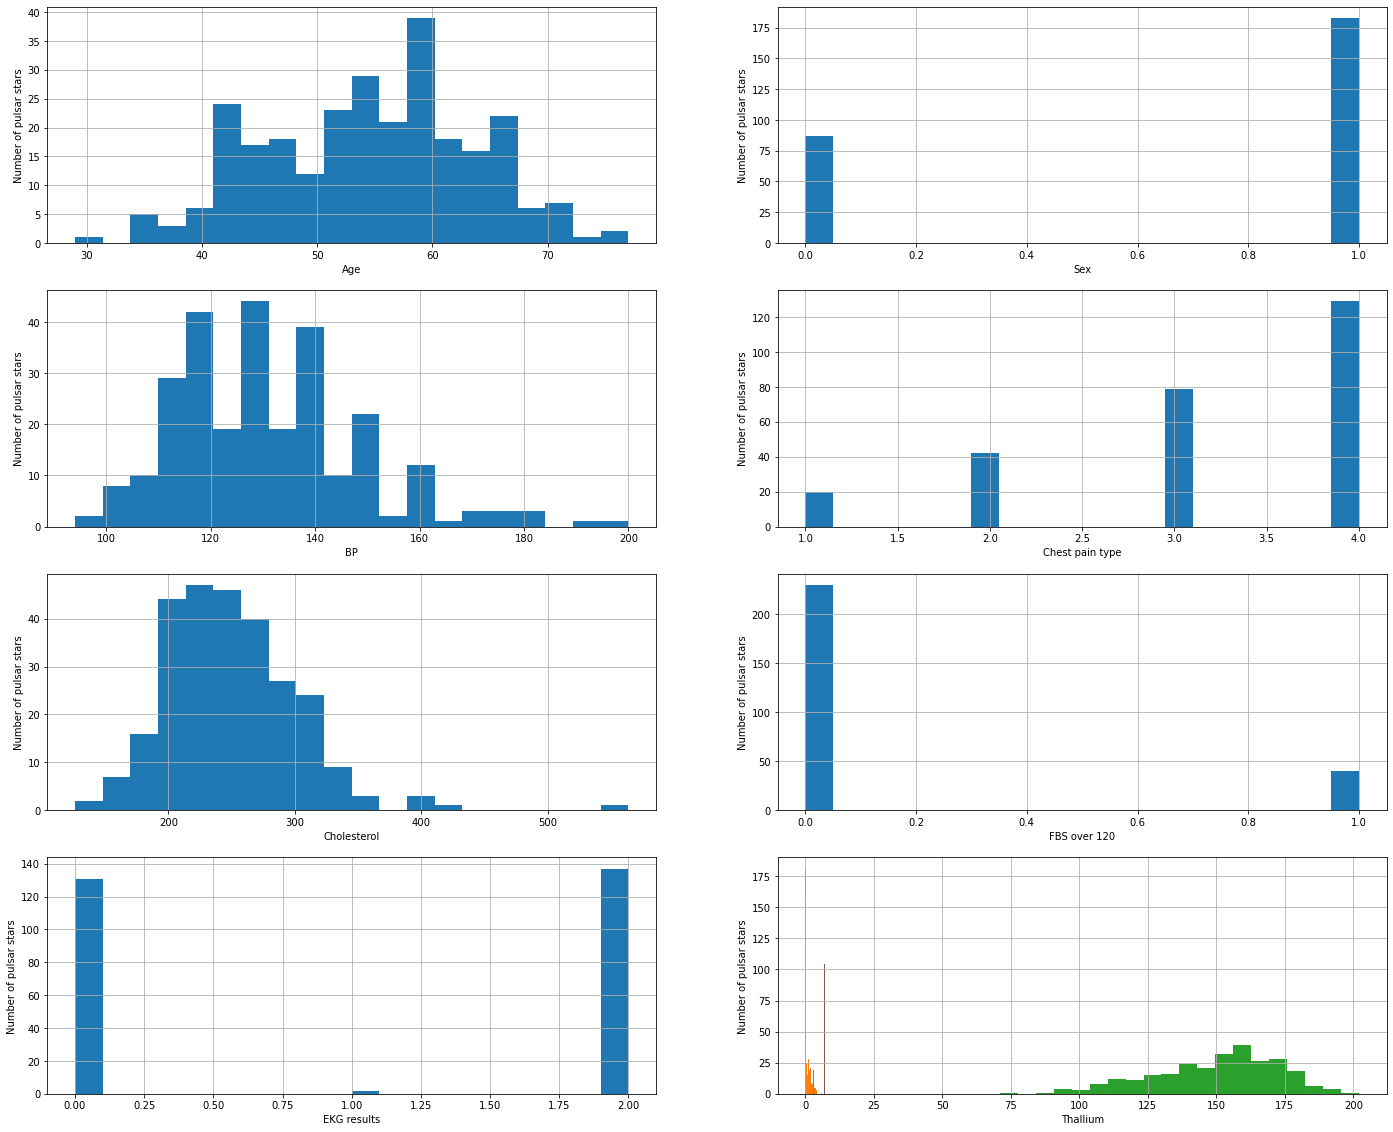

In [6]:
#Histogram Oluşturma ,Veri noktalarının Frekans dağılımlarını görmek ve veri dağılımını anlamak için kullandık. 
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = data['Age'].hist(bins=20)
fig.set_xlabel('Age')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 2)
fig = data['Sex'].hist(bins=20)
fig.set_xlabel('Sex')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 3)
fig = data['BP'].hist(bins=20)
fig.set_xlabel('BP')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 4)
fig = data['Chest pain type'].hist(bins=20)
fig.set_xlabel('Chest pain type')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 5)
fig = data['Cholesterol'].hist(bins=20)
fig.set_xlabel('Cholesterol')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 6)
fig = data['FBS over 120'].hist(bins=20)
fig.set_xlabel('FBS over 120')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 7)
fig = data['EKG results'].hist(bins=20)
fig.set_xlabel('EKG results')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 8)
fig = data['Slope of ST'].hist(bins=20)
fig.set_xlabel('Slope of ST')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 8)
fig = data['ST depression'].hist(bins=20)
fig.set_xlabel('ST depression')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 8)
fig = data['Max HR'].hist(bins=20)
fig.set_xlabel('Max HR')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 8)
fig = data['Exercise angina'].hist(bins=20)
fig.set_xlabel('Exercise angina')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 8)
fig = data['Number of vessels fluro'].hist(bins=20)
fig.set_xlabel('Number of vessels fluro')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 8)
fig = data['Thallium'].hist(bins=20)
fig.set_xlabel('Thallium')
fig.set_ylabel('Number of pulsar stars')


In [7]:
X = data.drop(['index','Heart_Disease'], axis=1)

y = data['Heart_Disease']

In [8]:
#Data setimizi test ve train olmak üzere 2'ye bölüyoruz
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [9]:

X_train.shape, X_test.shape


((216, 13), (54, 13))

In [10]:
cols = X_train.columns

In [11]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()#veri özelliklerini ortalama değeri çıkararak ve birim varyansla ölçeklendirerek standartlaştırma

X_train = scaler.fit_transform(X_train)# eğitim verilerinin dağılımını hesaplama

X_test = scaler.transform(X_test)

In [12]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [13]:
X_train.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02
mean,3.669904e-16,3.289550e-17,-5.037123e-17,-3.854941e-16,2.030269e-16,7.195890e-18,9.663052e-17,-5.263280e-16,1.027984e-17,5.396917e-17,-2.091948e-16,1.408338e-16,-1.634495e-16
std,1.002323e+00,1.002323e+00,1.002323e+00,1.002323e+00,1.002323e+00,1.002323e+00,1.002323e+00,1.002323e+00,1.002323e+00,1.002323e+00,1.002323e+00,1.002323e+00,1.002323e+00
min,-2.758607e+00,-1.491268e+00,-2.224548e+00,-2.179088e+00,-2.353957e+00,-4.093502e-01,-9.771353e-01,-2.686509e+00,-7.071068e-01,-8.838287e-01,-9.503660e-01,-6.924248e-01,-8.634424e-01
25%,-7.742474e-01,-1.491268e+00,-1.489438e-01,-6.671338e-01,-6.997575e-01,-4.093502e-01,-9.771353e-01,-7.535183e-01,-7.071068e-01,-8.838287e-01,-9.503660e-01,-6.924248e-01,-8.634424e-01
50%,1.076903e-01,6.705702e-01,-1.489438e-01,-8.561281e-02,-6.500674e-02,-4.093502e-01,-9.771353e-01,1.643822e-01,-7.071068e-01,-3.335424e-01,7.051102e-01,-6.924248e-01,-8.634424e-01
75%,6.864619e-01,6.705702e-01,8.888583e-01,4.959082e-01,5.168481e-01,-4.093502e-01,1.032972e+00,8.123120e-01,1.414214e+00,6.400409e-01,7.051102e-01,3.758877e-01,1.214592e+00
max,2.422777e+00,6.705702e-01,8.888583e-01,3.985034e+00,6.070917e+00,2.442896e+00,1.032972e+00,2.237757e+00,1.414214e+00,4.365055e+00,2.360586e+00,2.512513e+00,1.214592e+00


In [14]:
#Destek vektör Makinesi(SVM)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('varsayılan hiperparametreler ile test verileri üzerinde doğruluk skoru {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

varsayılan hiperparametreler ile test verileri üzerinde doğruluk skoru 0.7407


In [15]:
#
linear_svc=SVC(kernel='linear', C=1.0) #düzenleştirme parametresi ve Lineer çekirdek
linear_svc.fit(X_train,y_train)
y_p_test=linear_svc.predict(X_test)
print('lineer ve C=1.0 parametresi kullanarak test verileri üzerindeki doğruluk değeri: {0:0.4f}'. format(accuracy_score(y_test, y_p_test)))

lineer ve C=1.0 parametresi kullanarak test verileri üzerindeki doğruluk değeri: 0.7593


In [16]:
y_pred_train = linear_svc.predict(X_train)
y_pred_train

array(['Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Absence', 'Presence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Absence', 'Absence', 'Presence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Absence', 'Presence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Absence', 'Presence', 'Presence',
       'Absence', 'Absence', 'Presence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Presence', 'Absence',
     

In [17]:
print('Eğitim verisi Doğruluk skoru: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Eğitim verisi Doğruluk skoru: 0.8750


In [18]:
print('Eğitim Veri Kümesi Skoru: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test Veri kümesi Skoru: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Eğitim Veri Kümesi Skoru: 0.8750
Test Veri kümesi Skoru: 0.7593


In [19]:
y_test.value_counts()

Absence     30
Presence    24
Name: Heart_Disease, dtype: int64

In [20]:


null_accuracy = (30/(30+24))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))


Null accuracy score: 0.5556


In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_p_test) #karmaşıklık matrisi

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[24  6]
 [ 7 17]]

True Positives(TP) =  24

True Negatives(TN) =  17

False Positives(FP) =  6

False Negatives(FN) =  7


<AxesSubplot:>

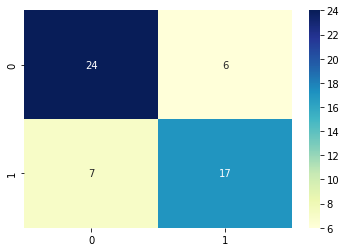

In [22]:
m_matrix= pd.DataFrame(data=cm,columns=['Actual Positive:1', 'Actual Negative:0'],index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_p_test))

              precision    recall  f1-score   support

     Absence       0.77      0.80      0.79        30
    Presence       0.74      0.71      0.72        24

    accuracy                           0.76        54
   macro avg       0.76      0.75      0.76        54
weighted avg       0.76      0.76      0.76        54



In [24]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [25]:
#Sınıflandırma Doğruluğu 
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Sınıflandırma Doğruluğu: {0:0.4f}'.format(classification_accuracy))

Sınıflandırma Doğruluğu: 0.7593


In [26]:

precision = TP / float(TP + FP)

print('Hassasiyet : {0:0.4f}'.format(precision))

Hassasiyet : 0.8000


In [27]:

recall = TP / float(TP + FN)

print('duyarlılık : {0:0.4f}'.format(recall))

duyarlılık : 0.7742


In [28]:

specificity = TN / (TN + FP)

print('Özgüllük: {0:0.4f}'.format(specificity))

Özgüllük: 0.7391


In [29]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Çapraz doğrulanmış ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Çapraz doğrulanmış ROC AUC : 0.9106


In [33]:
X = data.drop(['index','Heart_Disease'], axis=1)

y = data['Heart_Disease']

In [34]:
label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(y)

In [35]:
#Data setimizi test ve train olmak üzere 2'ye bölüyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)


In [36]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [37]:

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.decision_function(X_test)
y_pred_svm

array([ 4.05449749e-01,  5.11305041e-01, -1.28002261e+00, -1.66975758e+00,
       -8.55329777e-01,  1.11336466e-01,  3.69878661e-01, -1.64148106e+00,
       -3.58939070e-01, -1.22433062e+00, -6.56842366e-01, -2.51638384e-01,
        7.07766969e-01,  5.38500616e-01,  3.69263213e-01, -9.20937630e-01,
        1.55940130e-03, -6.35915069e-01,  9.93076209e-01, -6.35798083e-01,
        1.26242801e+00, -5.17807420e-01,  1.79196758e-01, -1.03307216e+00,
       -2.79929157e-01,  5.15009057e-01, -4.33208237e-01,  6.47650329e-01,
       -1.29893085e+00, -1.04306197e+00, -1.33815908e+00, -9.80601525e-01,
       -1.45210652e-02, -7.42641923e-01, -1.50887177e-01,  3.99793619e-01,
        1.14553299e+00, -1.11330418e+00,  8.19626176e-01, -6.33375897e-02,
       -1.46674851e+00, -9.88692846e-01, -9.78457744e-01, -4.58160251e-02,
       -9.63441689e-01, -1.55513739e+00, -1.14892926e+00,  4.91680166e-01,
        2.59463196e-01, -2.33343725e-02, -7.99226510e-01, -1.48626023e+00,
       -8.21523647e-01,  

In [38]:
# ROC eğrisini oluşturma
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
roc_auc = roc_auc_score(y_test, y_pred_svm)

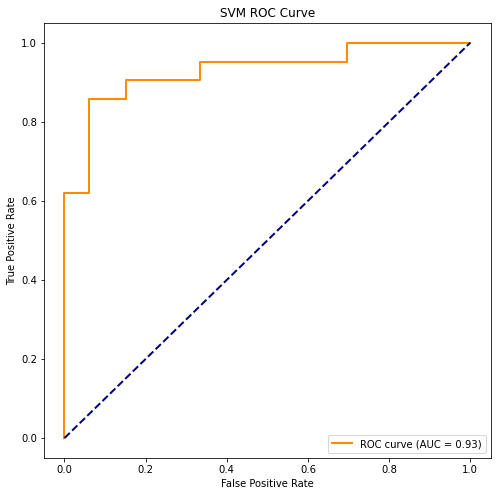

In [39]:
# ROC eğrisini çizme
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [40]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.decision_function(X_test)

In [41]:

X_train.shape, X_test.shape


((216, 13), (54, 13))

In [42]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)

In [43]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()#veri özelliklerini ortalama değeri çıkararak ve birim varyansla ölçeklendirerek standartlaştırma

X_train = scaler.fit_transform(X_train)# eğitim verilerinin dağılımını hesaplama

X_test = scaler.transform(X_test)

In [45]:
#Destek vektör Makinesi(SVM)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('varsayılan hiperparametreler ile test verileri üzerinde doğruluk skoru {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

varsayılan hiperparametreler ile test verileri üzerinde doğruluk skoru 0.8889


In [46]:
#
linear_svc=SVC(kernel='linear', C=1.0) #düzenleştirme parametresi ve Lineer çekirdek
linear_svc.fit(X_train,y_train)
y_p_test=linear_svc.predict(X_test)
print('lineer ve C=1.0 parametresi kullanarak test verileri üzerindeki doğruluk değeri: {0:0.4f}'. format(accuracy_score(y_test, y_p_test)))

lineer ve C=1.0 parametresi kullanarak test verileri üzerindeki doğruluk değeri: 0.8889


In [47]:
y_pred_train = linear_svc.predict(X_train)
y_pred_train

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0])

In [48]:
print('Eğitim verisi Doğruluk skoru: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Eğitim verisi Doğruluk skoru: 0.8565


In [49]:
print('Eğitim Veri Kümesi Skoru: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test Veri kümesi Skoru: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Eğitim Veri Kümesi Skoru: 0.8565
Test Veri kümesi Skoru: 0.8889


In [51]:


null_accuracy = (30/(30+24))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))


Null accuracy score: 0.5556
